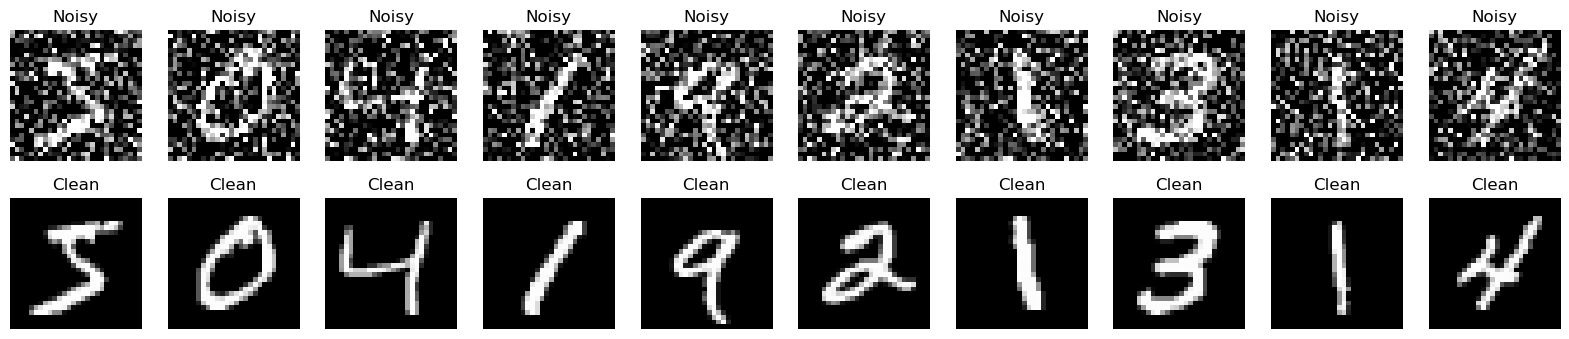

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values to range [0, 1]
x_train = x_train.astype("float32") / 255.
x_test = x_test.astype("float32") / 255.

# Reshape to include channel dimension (for convolutional layers)
x_train = np.reshape(x_train, (x_train.shape[0], 28, 28, 1))
x_test = np.reshape(x_test, (x_test.shape[0], 28, 28, 1))

# Add random noise to the images
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

# Clip values to be between 0 and 1 (due to added noise)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Display a few noisy and clean images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display noisy images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train_noisy[i].reshape(28, 28), cmap="gray")
    plt.title("Noisy")
    plt.axis("off")

    # Display clean images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_train[i].reshape(28, 28), cmap="gray")
    plt.title("Clean")
    plt.axis("off")
plt.show()


In [5]:
# Define the autoencoder model
input_img = layers.Input(shape=(28, 28, 1))

# Encoder
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input_img)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)

# Decoder
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)

# Complete autoencoder model
autoencoder = models.Model(input_img, decoded)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")

# Model summary
autoencoder.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,353 (110.75 KB)

 Trainable params: 28,353 (110.75 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Train the autoencoder
history = autoencoder.fit(
    x_train_noisy, x_train,
    epochs=10,
    batch_size=128,
    shuffle=True,
    validation_data=(x_test_noisy, x_test)
)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 39ms/step - loss: 0.2624 - val_loss: 0.1197
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - loss: 0.1175 - val_loss: 0.1109
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - loss: 0.1111 - val_loss: 0.1070
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - loss: 0.1077 - val_loss: 0.1054
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - loss: 0.1052 - val_loss: 0.1025
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - loss: 0.1034 - val_loss: 0.1011
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - loss: 0.1020 - val_loss: 0.1002
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 39ms/step - loss: 0.1010 - val_loss: 0.0995
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 41ms/step - loss: 0.1001 - val_loss: 0.0992
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - loss: 0.0995 - val_loss: 0.0981


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


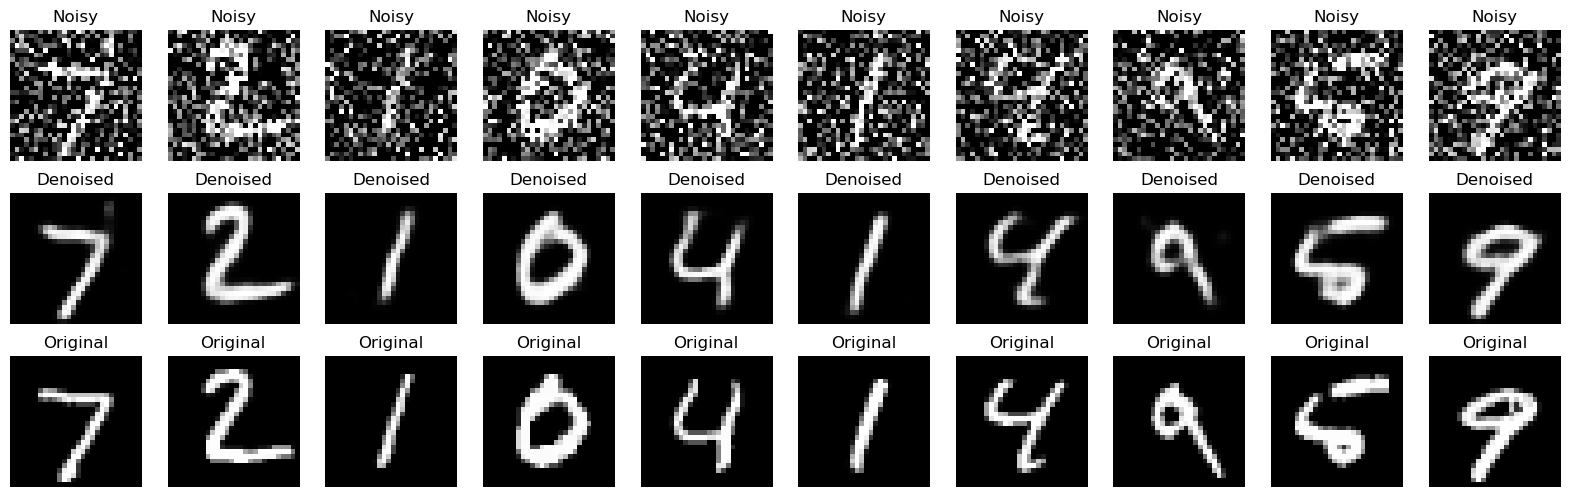

In [8]:
# Use the autoencoder to predict denoised images
denoised_images = autoencoder.predict(x_test_noisy)

# Display original noisy images and their denoised counterparts
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # Display noisy images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="gray")
    plt.title("Noisy")
    plt.axis("off")

    # Display denoised images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(denoised_images[i].reshape(28, 28), cmap="gray")
    plt.title("Denoised")
    plt.axis("off")

    # Display original images for comparison
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    plt.title("Original")
    plt.axis("off")
plt.show()
